**COMPUTER VISION WEEK 3 ASSIGNMENT** 

• DOMAIN: Botanical research


• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo 

In [ ]:
pip install keras-tuner --upgrade

In [1]:
# importing all the necessary libraries

%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
from skimage.transform import resize
from skimage.io import imread


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



from tensorflow import random
random.set_seed(1)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

import pickle
from tensorflow.keras.preprocessing import image



In [2]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# unzipping all the images to a target folder

!unzip '/content/drive/MyDrive/Computer Vision/Week_3/Train.zip' -d '/content/drive/MyDrive/Computer Vision/Week_3/Train_Images'

Archive:  /content/drive/MyDrive/Computer Vision/Week_3/Train.zip
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/fc95f5ed2.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/ca6c95ade.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/d068da45d.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/e475abfde.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/d14f74215.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/d21231f1d.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/cb0bc5c02.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/f77095d24.png  
  inflating: /content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Common wheat/cf0197941.png  
  inflating: /content/dri

In [ ]:
# specifying the path of the images so that they can be viewed

TRAin_DATA_FOLDER = "/content/drive/MyDrive/Computer Vision/Week_3/Train_Images"

In [ ]:
# assigning the images to variables

images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

In [ ]:
# defining a function to display images from each class

def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1       

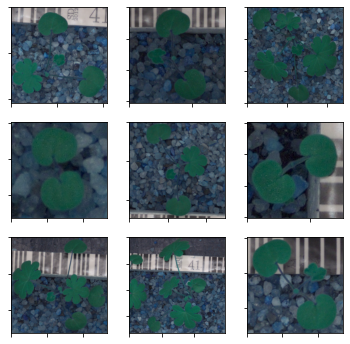

In [ ]:
# displaying the images of Small-flowered Cranesbill

plot_for_class("Small-flowered Cranesbill")

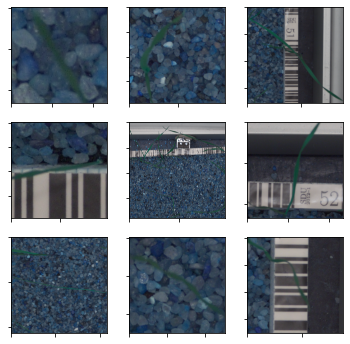

In [ ]:
# displaying the images of Black-grass

plot_for_class("Black-grass")

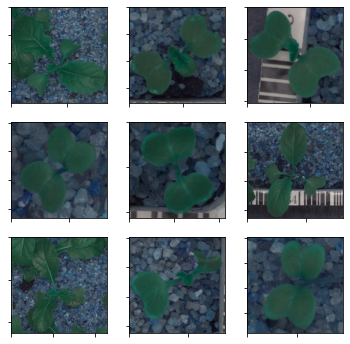

In [ ]:
# displaying the images of Charlock

plot_for_class("Charlock")

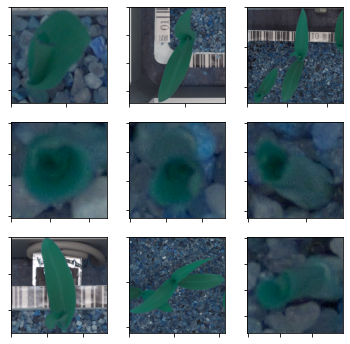

In [ ]:
# displaying the images of Maize

plot_for_class("Maize")

In [ ]:
# displaying the dimensions of the data
import imageio
im = imageio.imread("/content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Black-grass/0050f38b3.png")
print ("The dimension of the image is ",im.shape)
print (im.dtype)
im = imageio.imread("/content/drive/MyDrive/Computer Vision/Week_3/Train_Images/Black-grass/0260cffa8.png")
print ("The dimension of the image is ",im.shape)
print (im.dtype)

The dimension of the image is  (196, 196, 3)
uint8
The dimension of the image is  (886, 886, 3)
uint8


▶ We can see that all the images have 3 channels but have different lenght and width

In [ ]:
# storing the labels in a list

Categories=['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet']

# specifying the path of the images
flat_data_arr=[]
target_arr=[]

datadir='/content/drive/MyDrive/Computer Vision/Week_3/Train_Images' 

In [ ]:
# using for loop to iterate through the images and convert them to array and storing them in data frame

for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

# splitting into dependent and independent variables
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : Black-grass
loaded category:Black-grass successfully
loading... category : Charlock
loaded category:Charlock successfully
loading... category : Cleavers
loaded category:Cleavers successfully
loading... category : Common Chickweed
loaded category:Common Chickweed successfully
loading... category : Common wheat
loaded category:Common wheat successfully
loading... category : Fat Hen
loaded category:Fat Hen successfully
loading... category : Loose Silky-bent
loaded category:Loose Silky-bent successfully
loading... category : Maize
loaded category:Maize successfully
loading... category : Scentless Mayweed
loaded category:Scentless Mayweed successfully
loading... category : Shepherds Purse
loaded category:Shepherds Purse successfully
loading... category : Small-flowered Cranesbill
loaded category:Small-flowered Cranesbill successfully
loading... category : Sugar beet
loaded category:Sugar beet successfully


In [ ]:
# printing the shape of dependent and indepedent variables

print ("The shape of x is ",x.shape)
print ("The shape of y is ",y.shape)

The shape of x is  (4767, 30000)
The shape of y is  (4767,)


In [ ]:
# scaling the data and storing in new data frame

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(x)
X_s = pd.DataFrame(data = st.transform(x),columns = x.columns)

In [ ]:
del target_arr,flat_data_arr,flat_data

In [ ]:
# splitting x and y intor train and test data

X_train,X_test,y_train,y_test=train_test_split(X_s,y,test_size=0.20,random_state=77)

In [ ]:
# creating an object of LogisticRegression

LR=LogisticRegression(multi_class = 'multinomial',random_state=2)

In [ ]:
# fitting it on the trainig data

LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:812: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


LogisticRegression(multi_class='multinomial', random_state=2)

In [ ]:
print("The score of logistic refression on Training",LR.score(X_train,y_train))

The score of logistic refression on Training 1.0


In [ ]:
print("The score of logistic refression on Testing",LR.score(X_test,y_test))

The score of logistic refression on Testing 0.4790356394129979


In [ ]:
del x,y,img_array,img_resized

**NEURAL NETWORKS**

In [ ]:
# converting the y_train and y_test to categorical features

y_train = tf.keras.utils.to_categorical(y_train,num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=12)

In [ ]:
# defining a Neural network model using only the dense and activation functions

def mlp_model_complex():
    model = Sequential()
    model.add(Dense(50, input_shape = (30000, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(12, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = keras.optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
# compiling the model and validating on test data

model = mlp_model_complex()
history_NN = model.fit(X_train, y_train, epochs = 100,validation_data=(X_test,y_test),batch_size = 16,shuffle=False,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
239/239 [==============================] - 13s 39ms/step - loss: 2.6017 - accuracy: 0.1421 - val_loss: 2.1927 - val_accuracy: 0.2862
Epoch 2/100
239/239 [==============================] - 9s 38ms/step - loss: 2.2610 - accuracy: 0.2366 - val_loss: 1.9668 - val_accuracy: 0.3449
Epoch 3/100
239/239 [==============================] - 9s 37ms/step - loss: 2.0519 - accuracy: 0.2801 - val_loss: 1.7826 - val_accuracy: 0.3795
Epoch 4/100
239/239 [==============================] - 9s 39ms/step - loss: 1.9089 - accuracy: 0.3247 - val_loss: 1.6789 - val_accuracy: 0.4161
Epoch 5/100
239/239 [==============================] - 9s 37ms/step - loss: 1.7898 - accuracy: 0.3504 - val_loss: 1.6212 - val_accuracy: 0.4423
Epoch 6/100
239/239 [==============================] - 8s 35ms/step - loss: 1.7108 - accuracy: 0.3855 - val_loss: 1.5833 - val_accuracy: 0.4476
Epoch 7/100
239/239 [==============================] - 9s 37ms/step - loss: 1.6099 - accuracy: 0.4424 - val_loss: 1.5458 - val_accuracy

In [ ]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 0s 7ms/step - loss: 2.2796 - accuracy: 0.5031


[2.2795517444610596, 0.5031446814537048]

In [ ]:
del X_train,X_test,X_s,y_train,y_test

**CONVOLUTIONAL NEURAL NETWORKS**

**We will try using different models with different learning parameters to see which one gives the best validation accuracy**

▶ **We use the Image Data Generator class to rescale all the image and augement the images using sheer range, zoom range, horizontal flip**

▶ **We are using a target size of 64,64 and doing a validation split of 0.2 on our data**






In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Computer Vision/Week_3/Train_Images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 color_mode="rgb",
                                                 class_mode = 'categorical',
                                                 subset  = 'training',
                                                 seed=2)

validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Computer Vision/Week_3/Train_Images',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 color_mode="rgb",
                                                 class_mode = 'categorical',
                                                 subset  = 'validation',seed=2)



Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history_class = classifier.fit(training_set,
               validation_data = validation_set,
                         steps_per_epoch = int(3816/32),
                         epochs = 50)


Epoch 1/50
119/119 [==============================] - 1197s 10s/step - loss: 2.2131 - accuracy: 0.2244 - val_loss: 1.7987 - val_accuracy: 0.3628
Epoch 2/50
119/119 [==============================] - 95s 793ms/step - loss: 1.7080 - accuracy: 0.3864 - val_loss: 1.5200 - val_accuracy: 0.4669
Epoch 3/50
119/119 [==============================] - 90s 755ms/step - loss: 1.5197 - accuracy: 0.4693 - val_loss: 1.4173 - val_accuracy: 0.5237
Epoch 4/50
119/119 [==============================] - 91s 762ms/step - loss: 1.2688 - accuracy: 0.5566 - val_loss: 1.0892 - val_accuracy: 0.6435
Epoch 5/50
119/119 [==============================] - 92s 774ms/step - loss: 1.1229 - accuracy: 0.6144 - val_loss: 1.0844 - val_accuracy: 0.6341
Epoch 6/50
119/119 [==============================] - 91s 767ms/step - loss: 1.0346 - accuracy: 0.6335 - val_loss: 0.9160 - val_accuracy: 0.6972
Epoch 7/50
119/119 [==============================] - 95s 795ms/step - loss: 0.9298 - accuracy: 0.6765 - val_loss: 0.8949 - val_ac

In [ ]:
classifier.evaluate(validation_set)

30/30 [==============================] - 16s 533ms/step - loss: 0.4541 - accuracy: 0.8759


[0.454145222902298, 0.8759200572967529]

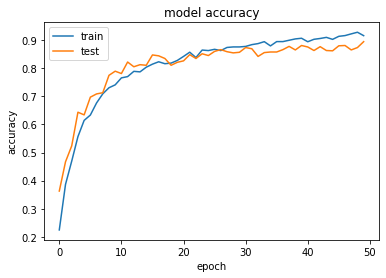

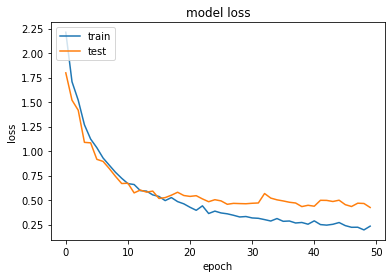

In [ ]:
plt.plot(history_class.history['accuracy'])
plt.plot(history_class.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_class.history['loss'])
plt.plot(history_class.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**The training and test accuracy of the model is very close whereas there is a slight difference in the training and the test loss.**

In [ ]:
def build_model(hp):
    # create model object
    model_hyper = Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(64,64,3)),
    
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),


        keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),



    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(12, activation='softmax')
    ])
    #compilation of model
    model_hyper.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model_hyper

In [ ]:
from keras_tuner import RandomSearch

tuner_search=RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=5,seed = 2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner_search.search(training_set,epochs=5,validation_data=validation_set)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuned=tuner_search.get_best_models(num_models=1)[0]
#summary of best model
tuned.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 80)        6080      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 48)        34608     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 48)         0

In [ ]:
history_tuned = tuned.fit(training_set,
          epochs=50,
          validation_data=validation_set)

Epoch 1/50
120/120 [==============================] - 115s 955ms/step - loss: 0.9895 - accuracy: 0.6570 - val_loss: 0.9895 - val_accuracy: 0.6646
Epoch 2/50
120/120 [==============================] - 111s 927ms/step - loss: 0.9954 - accuracy: 0.6520 - val_loss: 0.9378 - val_accuracy: 0.6824
Epoch 3/50
120/120 [==============================] - 110s 917ms/step - loss: 0.8578 - accuracy: 0.7044 - val_loss: 0.8864 - val_accuracy: 0.7098
Epoch 4/50
120/120 [==============================] - 111s 922ms/step - loss: 0.8249 - accuracy: 0.7159 - val_loss: 0.8207 - val_accuracy: 0.7213
Epoch 5/50
120/120 [==============================] - 110s 919ms/step - loss: 0.7686 - accuracy: 0.7358 - val_loss: 0.8088 - val_accuracy: 0.7424
Epoch 6/50
120/120 [==============================] - 110s 915ms/step - loss: 0.7407 - accuracy: 0.7442 - val_loss: 0.8650 - val_accuracy: 0.7161
Epoch 7/50
120/120 [==============================] - 109s 911ms/step - loss: 0.7350 - accuracy: 0.7463 - val_loss: 0.8176 -

In [ ]:
tuned.evaluate(validation_set)

30/30 [==============================] - 17s 566ms/step - loss: 0.7302 - accuracy: 0.8391


[0.7302039265632629, 0.8391166925430298]

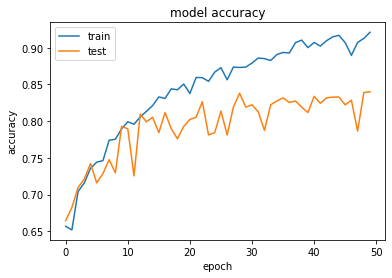

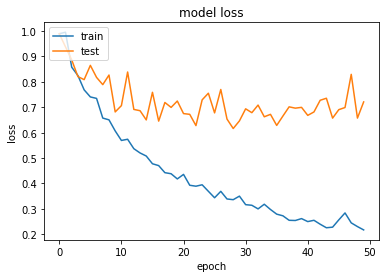

In [ ]:
plt.plot(history_tuned.history['accuracy'])
plt.plot(history_tuned.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_tuned.history['loss'])
plt.plot(history_tuned.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**There is a huge difference between the train , test accuracy and also there is huge difference in the train and test loss. The model has high variance and it is overfitting**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialising the CNN classifier
classifier3 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier3.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier3.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier3.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.8
classifier3.add(Dropout(0.8))


# Adding a fully connected layer with 128 neurons
classifier3.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
classifier3.add(Dense(units = 12, activation = 'softmax'))


classifier3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history_classifier = classifier3.fit(training_set,
               validation_data = validation_set,
                         steps_per_epoch = int(3816/32),
                         epochs = 100)


Epoch 1/100
119/119 [==============================] - 95s 793ms/step - loss: 2.4427 - accuracy: 0.1335 - val_loss: 2.4265 - val_accuracy: 0.1283
Epoch 2/100
119/119 [==============================] - 92s 769ms/step - loss: 2.2915 - accuracy: 0.2114 - val_loss: 1.9068 - val_accuracy: 0.3491
Epoch 3/100
119/119 [==============================] - 93s 785ms/step - loss: 1.8410 - accuracy: 0.3531 - val_loss: 1.6433 - val_accuracy: 0.4227
Epoch 4/100
119/119 [==============================] - 92s 773ms/step - loss: 1.6706 - accuracy: 0.4123 - val_loss: 1.5477 - val_accuracy: 0.4627
Epoch 5/100
119/119 [==============================] - 93s 782ms/step - loss: 1.5390 - accuracy: 0.4582 - val_loss: 1.2935 - val_accuracy: 0.5499
Epoch 6/100
119/119 [==============================] - 92s 772ms/step - loss: 1.3773 - accuracy: 0.5082 - val_loss: 1.2049 - val_accuracy: 0.6036
Epoch 7/100
119/119 [==============================] - 93s 783ms/step - loss: 1.2624 - accuracy: 0.5568 - val_loss: 1.1306 -

In [ ]:
classifier3.evaluate(validation_set)

30/30 [==============================] - 16s 522ms/step - loss: 0.4330 - accuracy: 0.8822


[0.4330292344093323, 0.882229208946228]

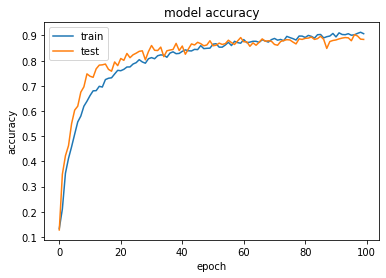

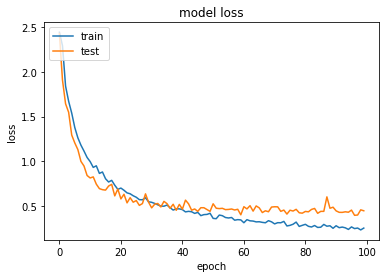

In [ ]:
plt.plot(history_classifier.history['accuracy'])
plt.plot(history_classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_classifier.history['loss'])
plt.plot(history_classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

▶**We have first tried to predict the type of the plants using the machine learning algorithm. Logistic Regression
is used to perform this task. We can see that the score on the training set is perfect with 1.0 whereas the score
on the testing set is at 0.47. This means that the model has huge variance and it is overfitting on the data. The machine 
learning model all though faster than all of the models performs poorly on the test data and it isn't ideal for deploying 
into production.**


▶**We have then tried to use a simple neural network with 5 layers. This is also a simple model and takes very less time for
training. We can see that the validation accuracy is around 0.50 and the training accuracy is 0.92. The neural networks model
has high variance and it is overfitting on the model, even with dropout and batchnormalization layers the neural networks model
 overfits on the data. The loss on the training set is at about 0.2 whereas the loss on validation is at about 2.27. This model
is not ideal for deploying into production**


▶**We have tried 3 convolutional neural networks model. The first model is just a simple model which is 4 layers deep and
 a dropout of 0.5. We can see that the model is performing way better when compared to the machine learning and the neural networks
 model. The training accuracy and the loss is at 0.91 and 0.234 respectively and the validation accuracy and the loss is at 0.87 and
 0.45 respectively. The  model has low variance and low bias. This model is ideal for deploying into production as the error rate
 is similar to that of the training set. The overfitting problem might have been reduced due to three factors. The data augmentation 
of the existing images, the convolution and the pooling layers and the dropout**


▶**We have tried to fine tune the model with keros autotuner without the dropout layer which leads to a slight variance of about nearly 10 percent.
Then I have tried the same convo-net in the first approach with a dropout of 0.8. This new model performs better than the first convo-net 
as the training accuracy and loss is 0.90 and 0.25 respectively and the validation accuracy and the validation loss is at 0.88 and 0.433 respectively.
This model has low variance and low bias. It is the ideal model and will be pickled for future use**


▶**We observe that the convo-net performs better than all the other models without overfitting. The accuracy and the loss of the convo-net is leaps and bounds ahead even for a simple 4 layer model.**

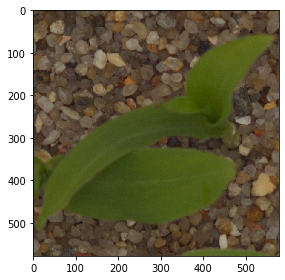

In [5]:
# displaying the image

import skimage
from skimage import io
file = os.path.join(skimage.data_dir, '/content/drive/MyDrive/Computer Vision/Week_3/Predict.png') 
myimg = io.imread(file)
io.imshow(myimg) 
io.show()

In [ ]:
pip install h5py

In [ ]:
# pickling the model using both methods

classifier3.save("Assignment_computer_vision-model.h5")

In [ ]:
with open('Assignment_Computer_Vision.pickle','wb') as modelFile:
     pickle.dump(classifier3,modelFile)

pickled_model = pickle.load(open('Assignment_Computer_Vision.pickle', 'rb'))

predict_path = "/content/drive/MyDrive/Computer Vision/Week_3/Predict.png"

# preprocessing the image to do the prediction on
predict_image = image.load_img(predict_path, target_size=(64, 64))
pred_array = image.img_to_array(predict_image)
predict_batch = np.expand_dims(pred_array, axis=0)

# saving the prediction from preprocessed image
prediction = pickled_model.predict(predict_batch)

# getting the class of the Image datagenerators
classes = training_set.class_indices 

INFO:tensorflow:Assets written to: ram://17fa9ec4-dc5b-4742-baf6-e5f06f9c64ad/assets


In [ ]:
pred_lab = np.argmax(prediction)

In [ ]:
# printing the class of the predicted image

keys = [k for k, v in classes.items() if v == pred_lab]
print('The image belongs to',keys)

The image belongs to ['Maize']
